# Assignment 4


Please do not change, delete or edit any cells. Write your code in between designated lines.

## Question 1 (25 points)

In [2]:
!pip install Seaborn
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 12.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 15.6 MB/s eta 0:00:0000:0100:01


In [1]:
# Please go to Palette_training_4 GitHub repo and 

# 1. Read Sask_RM_data.csv.
# 2. Rename column namse Crop Year, Canola - bu/ac, Spring Wheat - bu/ac with
# Year, Canola, SpringWheat respectively.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium


In [4]:
# 1. Read csv file by using pandas 

## Your code here - down ##
df = pd.read_csv('Sask_RM_data.csv')
## Your code here - up ##

In [7]:
df.head()

,Crop Year,RM,Canola - bu/ac,Spring Wheat - bu/ac
0,2012,1,22.3,36.2
1,2012,2,28.6,37.2
2,2012,3,25.1,39.4
3,2012,4,21.6,31.6
4,2012,5,26.8,29.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2950 entries, 0 to 2949
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Crop Year             2950 non-null   int64  
 1   RM                    2950 non-null   int64  
 2   Canola - bu/ac        2905 non-null   float64
 3   Spring Wheat - bu/ac  2899 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 92.3 KB


In [10]:
# 2. Rename columns

## Your code here - down ##
df.rename(columns={'Crop Year':'Year', 'Canola - bu/ac':'Canola', 'Spring Wheat - bu/ac':'SpringWheat'}, inplace=True)
## Your code here - up ##

In [11]:
df.columns

Index(['Year', 'RM', 'Canola', 'SpringWheat'], dtype='object')

Question 2 (65 points)

In [13]:
# 1. How many missing values in each column? 

## Your code here - down ##
df.isna().sum()
## Your code here - up ##

Year            0
RM              0
Canola         45
SpringWheat    51
dtype: int64

In [12]:
df.isnull().sum()

Year            0
RM              0
Canola         45
SpringWheat    51
dtype: int64

In [14]:
# 2. Find unique values of RMs(Rural Municipalities).

## Your code here - down ##
df["RM"].unique() 
## Your code here - up ##

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  17,
        18,  19,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  42,
        43,  44,  45,  46,  49,  51,  61,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141,
       142, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 171, 181, 183, 184, 185, 186,
       187, 189, 190, 191, 193, 194, 211, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232,
       241, 243, 244, 245, 246, 247, 248, 250, 251, 252, 253, 254, 255,
       256, 257, 259, 260, 261, 271, 273, 274, 275, 276, 277, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 290, 292, 301, 30

In [15]:
# 3. Use groupby() and find top 10 RMs in terms of average Canola yield through 10 years.

## Your code here - down ##
df.groupby("RM")["Canola"].mean().sort_values(ascending=False).head(10)
## Your code here - up ##

RM
271    45.284
470    45.018
439    44.116
303    43.624
338    42.881
493    42.819
440    42.747
464    42.515
410    42.223
434    41.868
Name: Canola, dtype: float64

In [16]:
# 4. Use groupby() function and find worst 10 RMs in terms of average Spring Wheat through 10 years.

## Your code here - down ##
df.groupby("RM")["SpringWheat"].mean().sort_values(ascending=True).head(10)
## Your code here - up ##

RM
44     20.339000
10     21.168571
69     22.418000
45     22.920000
40     23.265000
19     24.163000
51     24.683000
101    24.993000
9      25.364000
70     25.807000
Name: SpringWheat, dtype: float64

In [17]:
# 4. Use groupby() function and find worst 3 best years in terms of average Spring Wheat.

## Your code here - down ##
df.groupby("Year")["SpringWheat"].mean().sort_values(ascending=False).head(3)
## Your code here - up ##

Year
2020    49.443357
2019    49.227431
2013    47.431525
Name: SpringWheat, dtype: float64

In [18]:
# 5. Use groupby() function and find worst 3 years in terms of average Spring Wheat through 10 years.

## Your code here - down ##
df.groupby("Year")["SpringWheat"].mean().sort_values(ascending=True).head(3)
## Your code here - up ##

Year
2021    30.216725
2012    34.831633
2015    37.016599
Name: SpringWheat, dtype: float64

## Question 3 (10 points)

This task is independent exploratory data analysis. Find key insights from the dataset and share your code by creating new cells.

In [19]:
df

,Year,RM,Canola,SpringWheat
0,2012,1,22.3,36.2
1,2012,2,28.6,37.2
2,2012,3,25.1,39.4
3,2012,4,21.6,31.6
4,2012,5,26.8,29.0
...,...,...,...,...
2945,2021,520,36.6,46.9
2946,2021,555,36.9,54.1
2947,2021,561,26.8,47.6
2948,2021,588,30.2,46.1


In [24]:
df.describe()

,Year,RM,Canola,SpringWheat
count,2950.000000,2950.000000,2905.000000,2899.000000
mean,2016.500000,247.298305,34.537115,42.008537
std,2.872768,148.244294,9.265391,12.039952
min,2012.000000,1.000000,4.000000,3.300000
25%,2014.000000,123.000000,28.300000,34.380000
50%,2016.500000,246.000000,35.600000,42.310000
75%,2019.000000,369.000000,41.250000,50.000000
max,2021.000000,622.000000,57.930000,198.000000


In [27]:
# find the correlation between Canola and SpringWheat
df1 = df[['Canola', 'SpringWheat']]
df1.corr()

,Canola,SpringWheat
Canola,1.000000,0.743229
SpringWheat,0.743229,1.000000


<AxesSubplot:xlabel='Canola', ylabel='SpringWheat'>

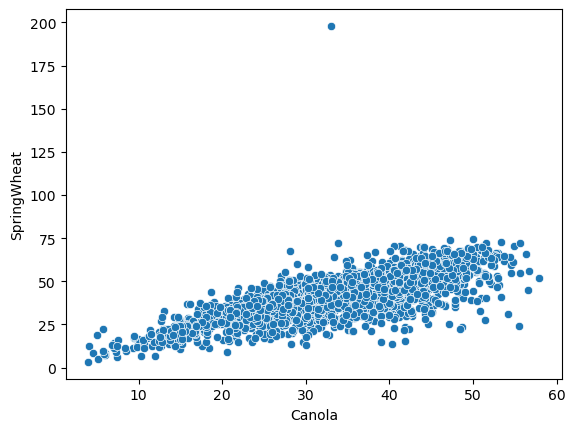

In [28]:
# 1. Use seaborn to plot a scatter plot between Canola and SpringWheat.
df1 = df[['Canola', 'SpringWheat']]
sns.scatterplot(data=df1, x="Canola", y="SpringWheat")
